### Importing libraries

In [41]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import matplotlib.pyplot as plt
from PIL import Image

### Dataset path

In [42]:
dataset_path=r'.\Dataset'

### Parameters 

In [43]:
img_width, img_height = 224, 224  
channels = 3

### Dataset  information

In [44]:
image_extensions = ('.png', '.jpg', '.jpeg', '.webp','gif')

category_counts = {}

for category in os.listdir(dataset_path):
    category_path = os.path.join(dataset_path, category)
    
    if os.path.isdir(category_path):
        image_count = sum(1 for file in os.listdir(category_path) if file.lower().endswith(image_extensions))
        category_counts[category] = image_count

total_images = 0
for category, count in category_counts.items():
    print(f"Category: {category} Images: {count}")
    total_images += count

print(f"Total Images: {total_images}")

Category: bag Images: 1000
Category: cup Images: 950
Category: hat Images: 1000
Category: lamp Images: 1050
Category: Sofa Images: 1000
Category: umbrella Images: 1055
Category: watch Images: 1045
Category: water bottles Images: 900
Total Images: 8000


### Building Model

In [45]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_width, img_height, channels)
    )
base_model.trainable = False

In [46]:
model = Sequential([
    base_model,
    Flatten()
])

In [47]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

### Extract features from an image

In [48]:
def extract_features(img_path, model):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
    img_data = tf.keras.preprocessing.image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = tf.keras.applications.vgg16.preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

### Store extracted features and image paths

In [49]:
features_list = []
relative_image_paths = []
for root, dirs, files in os.walk(dataset_path):
    for img_file in files:
        img_path = os.path.join(root, img_file)
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg', 'webp')):
            relative_path = os.path.relpath(img_path, dataset_path)  # Compute relative path
            features = extract_features(img_path, model)
            features_list.append(features)
            relative_image_paths.append(relative_path)  # Store relative path

features_array = np.array(features_list)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

c:\Users\daniy\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [50]:
with open('features_list.pkl', 'wb') as f:
    pickle.dump(features_list, f)

with open('image_paths.pkl', 'wb') as f:
    pickle.dump(relative_image_paths, f)

### Find similar images

In [51]:
def find_similar_images(input_img_path, features_array, relative_image_paths, model, top_n=6, threshold=0.30):
    input_features = extract_features(input_img_path, model)
    similarities = cosine_similarity([input_features], features_array)[0]
    top_indices = np.argsort(similarities)[::-1][:top_n]
    top_similarities = similarities[top_indices]
    if top_similarities[0] < threshold:
        print("No similar image found.")
        return []
    return [(relative_image_paths[i], similarities[i]) for i in top_indices]

### Function to display the similar images


In [52]:
def show_similar_images(similar_images, dataset_path):
    if not similar_images:
        print("No images to display.")
        return
    plt.figure(figsize=(15, 10))
    for i, (rel_path, similarity) in enumerate(similar_images):
        img_path = os.path.join(dataset_path, rel_path)  # Reconstruct absolute path
        img = Image.open(img_path)
        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(f"Similarity: {similarity:.4f}")
        plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


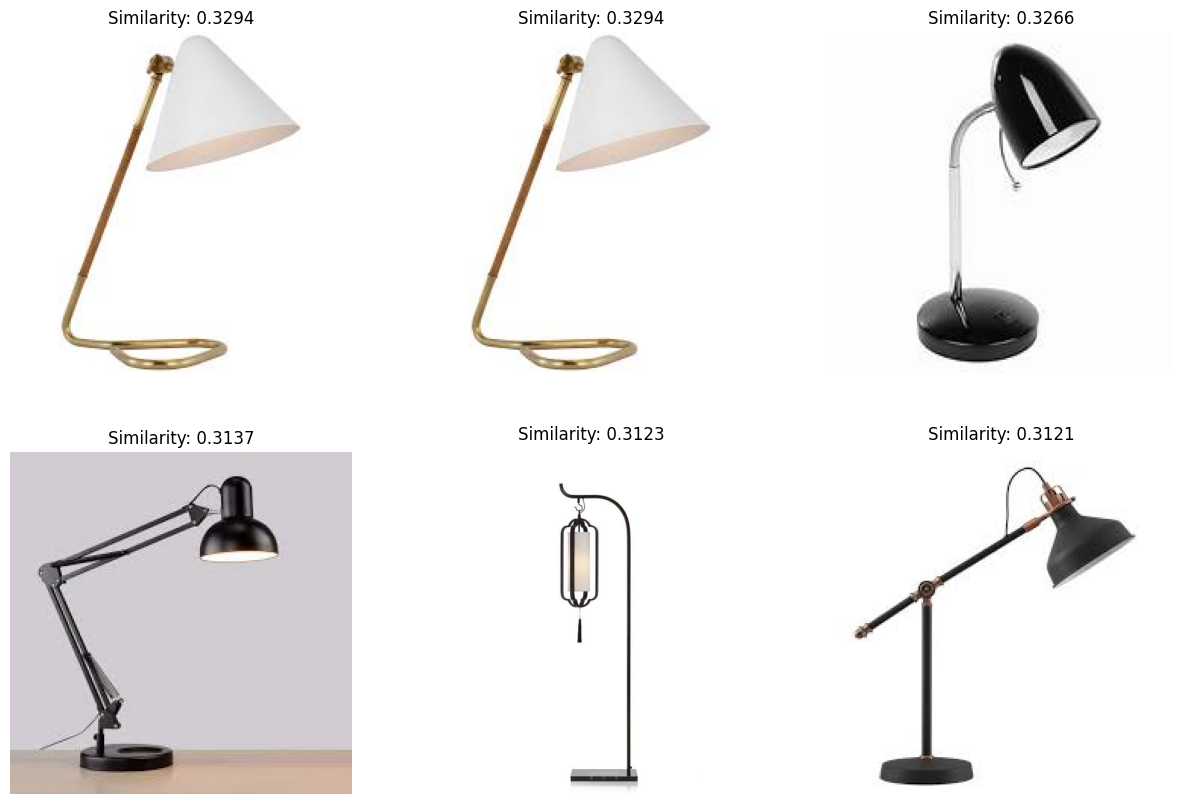

In [53]:
input_image_path = r'D:\FYP\Backened\test\images (1).jpeg'

with open('image_paths.pkl', 'rb') as f:
    relative_image_paths = pickle.load(f)

absolute_image_paths = [os.path.join(dataset_path, rel_path) for rel_path in relative_image_paths]

similar_images = find_similar_images(input_image_path, features_array, relative_image_paths, model, threshold=0.30)
show_similar_images(similar_images, dataset_path)

### Save trained model


In [54]:
model.save('SBIR_model.keras')

### Loading the saved model

In [55]:
model=tf.keras.models.load_model('SBIR_model.keras')

In [61]:
import pickle

# Specify the path to the image_path.pkl file
image_path_file = "./image_paths.pkl"

# Load the data from the pickle file
with open(image_path_file, 'rb') as file:
    image_paths = pickle.load(file)

# Print the data
print("Loaded image paths:")
for i, path in enumerate(image_paths, start=1):
    print(f"{i}: {path}")

# Optional: Check the number of paths loaded
print(f"\nTotal paths loaded: {len(image_paths)}")


Loaded image paths:
1: bag\bag_1.jpeg
2: bag\bag_10.jpeg
3: bag\bag_100.jpeg
4: bag\bag_101.jpeg
5: bag\bag_102.jpeg
6: bag\bag_103.jpeg
7: bag\bag_104.jpeg
8: bag\bag_105.jpeg
9: bag\bag_106.jpeg
10: bag\bag_107.jpeg
11: bag\bag_108.jpeg
12: bag\bag_109.jpeg
13: bag\bag_11.jpeg
14: bag\bag_110.jpeg
15: bag\bag_111.jpeg
16: bag\bag_112.jpeg
17: bag\bag_113.jpeg
18: bag\bag_114.jpeg
19: bag\bag_115.jpeg
20: bag\bag_116.jpeg
21: bag\bag_117.jpeg
22: bag\bag_118.jpeg
23: bag\bag_119.jpeg
24: bag\bag_12.jpeg
25: bag\bag_120.jpeg
26: bag\bag_121.jpeg
27: bag\bag_122.jpeg
28: bag\bag_123.jpeg
29: bag\bag_124.jpg
30: bag\bag_125.jpeg
31: bag\bag_126.jpeg
32: bag\bag_127.jpeg
33: bag\bag_128.jpeg
34: bag\bag_129.jpeg
35: bag\bag_13.jpeg
36: bag\bag_130.jpeg
37: bag\bag_131.jpeg
38: bag\bag_132.jpeg
39: bag\bag_133.jpeg
40: bag\bag_134.jpg
41: bag\bag_135.jpeg
42: bag\bag_136.jpeg
43: bag\bag_137.jpeg
44: bag\bag_138.jpeg
45: bag\bag_139.jpeg
46: bag\bag_14.jpeg
47: bag\bag_140.jpeg
48: bag\bag